In [34]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib
import matplotlib.pyplot as plt
from pylab import*
%matplotlib inline 
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 5)
import re
from wordcloud import WordCloud

### Visualizando nuestro dataframe

In [2]:
df = pd.read_csv('data/alltopics.csv', index_col=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 11 columns):
Usuario        12545 non-null object
Nombre         12545 non-null object
Fecha          12545 non-null object
Tweet          12545 non-null object
RT             12545 non-null int64
like           12545 non-null int64
path           12545 non-null object
verificados    235 non-null object
tópico         12545 non-null object
sentimiento    12545 non-null float64
categoría      12545 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB
None


In [3]:
df.head()

,Usuario,Nombre,Fecha,Tweet,RT,like,path,verificados,tópico,sentimiento,categoría
0,@jaymee_danielle,zen kitty,10 dic. 2017,issues i have w/ GMO:\n• doesnt taste “natural...,67,179,/jaymee_danielle/status/939965734196842496,NaN,Allergy,0.0900,Neutral
1,@systecdb,Dave Baggett,10 dic. 2017,It dawns on me that before GMO foods became pr...,0,1,/systecdb/status/939776697724997632,NaN,Allergy,0.4767,Positivo
2,@saltedveg,ingin punya tuyul saja,10 dic. 2017,Coz it's 'cool'. Just like people who suddenly...,1,1,/saltedveg/status/939675324765298688,NaN,Allergy,0.9068,Positivo
3,@RMathebulo,Rantho Mathebulo,9 dic. 2017,Alcoholism gout acne genetically modified food...,0,0,/RMathebulo/status/939601946960453633,NaN,Allergy,-0.7412,Negativo
4,@carmelabny,JOSEPHINE BOLOGNA,8 dic. 2017,Foods to eat every day and a healthy product t...,7,4,/carmelabny/status/939102225800028160,NaN,Allergy,0.4738,Positivo


### Describe Number of Hashtags Used

In [7]:
hashtags = []
hashtags_count = []
for texto in df['Tweet']:
    hashtag = re.findall(r"#(\w+)", texto)
    hashtags.append(hashtag)
    hashtags_count.append(len(hashtag))
df['entities_hashtags'] = hashtags
df['entities_hashtags_count'] = hashtags_count
df.tail()
    

,Usuario,Nombre,Fecha,Tweet,RT,like,path,verificados,tópico,sentimiento,categoría,entities_hashtags,entities_hashtags_count
12540,@JeffHollandaise,Jeff Holiday 🍆,9 may. 2016,New Vid:Bought: The Movie Review - 'The Expert...,4,4,/JeffHollandaise/status/729675220013883393,NaN,vaccines,-0.3595,Neutral,"[GMO, vaccine, pseudoscience, Bought]",4
12541,@VaxCalc,Vaccine Calculator ♥,9 may. 2016,"Australia considering ""intentional release of ...",2,1,/VaxCalc/status/729644348208517120,NaN,vaccines,0.0000,Neutral,[LabelGMOs],1
12542,@princes31899030,princesselizabethhal,8 may. 2016,@usainbolt GMO mosquito coming to Cayman Islan...,0,0,/princes31899030/status/729436159458181121,NaN,vaccines,-0.3400,Neutral,[],0
12543,@jennyfrky,Virginia Gilbert,8 may. 2016,Australia to Vaccinate Human Population by 'Ch...,1,1,/jennyfrky/status/729290528458735616,NaN,vaccines,0.0000,Neutral,[],0
12544,@millliepoppy,Millie,8 may. 2016,What's with Instagram vegans being so anti-vac...,0,1,/millliepoppy/status/729275586363985921,NaN,vaccines,-0.2111,Neutral,[],0


In [8]:
df['entities_hashtags_count'].describe()

count    12545.000000
mean         1.344759
std          2.267715
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         37.000000
Name: entities_hashtags_count, dtype: float64

In [9]:
df['entities_hashtags_count'].value_counts()

0     6741
1     1984
2     1379
3      957
4      466
5      302
6      240
7      149
8      116
9       72
10      45
11      31
12      12
13      11
16      10
14       6
19       4
17       4
21       4
15       3
37       2
18       2
22       1
25       1
20       1
29       1
23       1
Name: entities_hashtags_count, dtype: int64

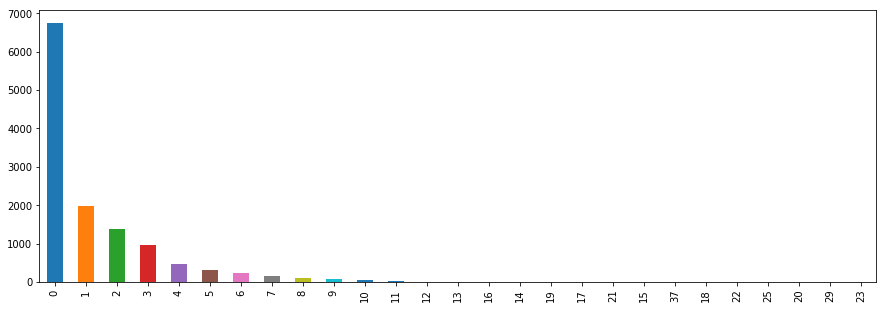

In [10]:
df['entities_hashtags_count'].value_counts().plot(kind='bar')

### Count Frequencies for Specific Hashtags

In [20]:
hashtag_list = []                          #CREATE EMPTY LIST 
for i in df.entities_hashtags:    #LOOP OVER EVERY CELL IN ENTITIES_HASHTAGS
    if len(i)!=0:                      #IF CELL NOT EMPTY

        for t in i:                     #FOR EACH TAG IN THE CELL
            t = "#"+t                      #ADD '#' SYMBOL TO BEGINNING OF EACH TAG
            t = t.replace(',', '')         #REMOVE COMMAS FROM END OF TAGS
            t = t.lower()                  #MAKE TAG LOWER CASE
            hashtag_list.append(t)         #ADD TAG TO OUR LIST
print(len(hashtag_list))                  #PRINT NUMBER OF ITEMS IN OUR LIST
hashtag_list[:20]                          #SHOW THE FIRST 20 ITEMS OF THE LIST

16870


['#health',
 '#allergy',
 '#allergic',
 '#gmo',
 '#vaccines',
 '#gmo',
 '#chemfarming',
 '#smartmeters',
 '#genderconfusion',
 '#allergies',
 '#allergy',
 '#gmos',
 '#products',
 '#maize',
 '#soybeans',
 '#wheat',
 '#seeds',
 '#causes',
 '#allergy',
 '#cancers']

In [21]:
Series(hashtag_list).value_counts()

#gmo                     4385
#gmos                     679
#biodiversity             561
#pesticides               410
#monsanto                 363
#environment              271
#righttoknow              262
#cancer                   241
#health                   235
#vaccine                  234
#organic                  194
#allergies                190
#food                     178
#glyphosate               167
#medicine                 136
#inequality               130
#science                  130
#roundup                   62
#vaccines                  58
#agriculture               55
#nature                    54
#bigpharma                 49
#climatechange             48
#ogm                       46
#bees                      46
#geoengineering            46
#fluoride                  45
#nogmo                     45
#biotech                   44
#chemtrails                44
                         ... 
#gerrymandering             1
#dfid                       1
#gmosalmon

In [22]:
cnt_hashtags = DataFrame(Series(hashtag_list).value_counts())  
cnt_hashtags.columns = ['tag_frequency']                       
cnt_hashtags



,tag_frequency
#gmo,4385
#gmos,679
#biodiversity,561
#pesticides,410
#monsanto,363
#environment,271
#righttoknow,262
#cancer,241
#health,235
#vaccine,234


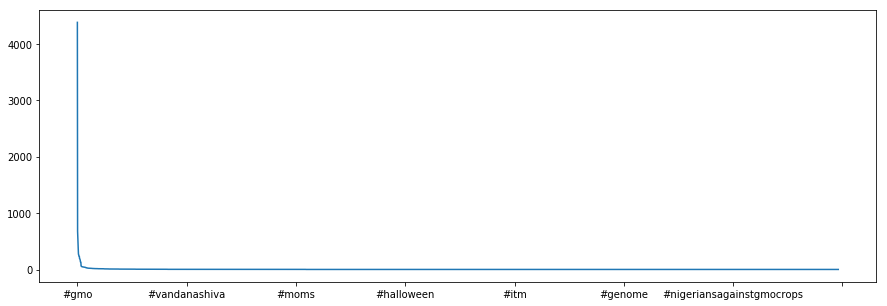

In [23]:
cnt_hashtags['tag_frequency'].plot()

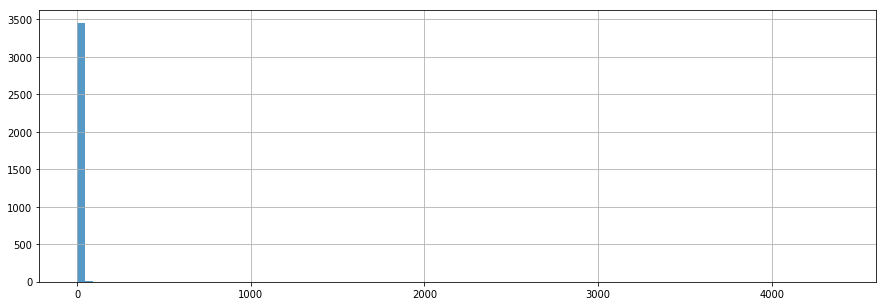

In [24]:
density_plot = cnt_hashtags['tag_frequency'].hist(bins=100, alpha=0.75)

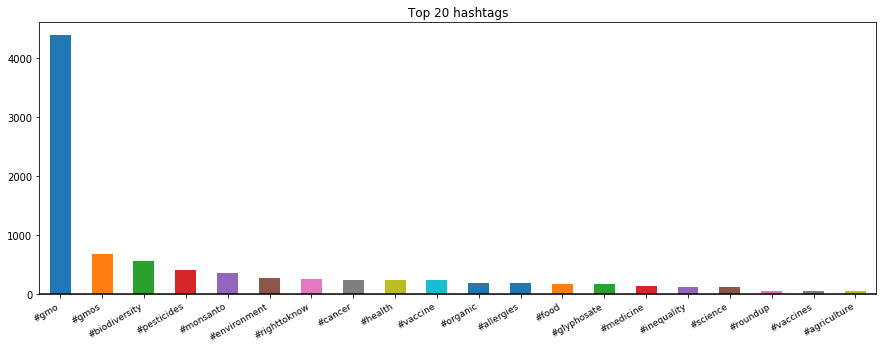

In [27]:
cnt_hashtags['tag_frequency'][:20].plot(kind='bar')
axhline(0, color='k')
title('Top 20 hashtags')
xticks(fontsize = 9,rotation = 30, ha='right')
savefig('img/20 most popular tags.png', bbox_inches='tight', dpi=300, format='png')
show()

### Generate Tag Clouds

In [31]:
all_tags = []
for tag in df['entities_hashtags']:
    if len(tag) > 0:
        for eachtag in tag:
            all_tags.append(eachtag)
        
all_hashtags = ' '.join(all_tags)
out = open('data/all_text_HASHTAGS.txt','w') 
out.write(all_hashtags) 
out.close() 
  

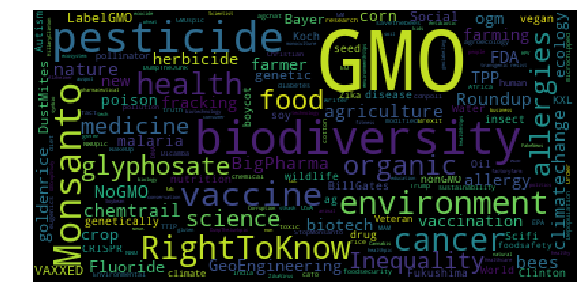

In [36]:
wordcloud = WordCloud(collocations=False).generate(all_hashtags)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()